# Data Preprocessing

✅ Steps Covered:
1. Load and explore the dataset

2. Clean the data – handle missing values, outliers, duplicates

3. Analyze – filtering, visualizations

4. Encode – convert categorical data

5. Scale – StandardScaler & MinMaxScaler

In [5]:
# Step 0: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [10]:
# Step 1: Load the dataset
df = pd.read_csv("C://Users//SHONIMA S//OneDrive//Documents//datascience//Employee.csv")


In [11]:
# Step 2: Data Exploration
#Explore the data, list down the unique values in each feature and find its length.
#Perform the statistical analysis and renaming of the columns.
print("First 5 Rows:\n", df.head())
print("\nColumn Names:", df.columns)
print("\nShape of dataset:", df.shape)

First 5 Rows:
    Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0

Column Names: Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

Shape of dataset: (148, 6)


In [12]:
# Unique values in each column
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique Values in Each Column:
Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values


In [14]:
# Renaming columns to lowercase and replacing spaces with underscores
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

In [15]:
# Statistical summary
print("\nStatistical Summary:\n", df.describe(include='all'))


Statistical Summary:
        company         age       salary   place country      gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000


In [ ]:
# Step 3: Data Cleaning
#Find the missing and inappropriate values, treat them appropriately.
#Remove all duplicate rows.
#Find the outliers.
#Replace the value 0 in age as NaN
#Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [ ]:
# Replace '0' in 'age' with NaN
df['age'] = df['age'].replace(0, np.nan)

In [16]:
# Check missing values
print("\nMissing Values Before Treatment:\n", df.isnull().sum())


Missing Values Before Treatment:
 company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64


In [17]:
# Fill missing numerical values with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())


In [21]:
# Fill missing categorical values with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [22]:
# Remove duplicates
df = df.drop_duplicates()


In [23]:
# Detect outliers using IQR method
def find_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]


In [24]:
print("\nOutliers in 'age':\n", find_outliers('age'))
print("\nOutliers in 'salary':\n", find_outliers('salary'))



Outliers in 'age':
      company  age  salary       place country  gender
88   Infosys  0.0  3030.0    Calcutta   India       0
92       TCS  0.0  3045.0       Delhi   India       0
101      CTS  0.0  2034.0  Podicherry   India       0
107      TCS  0.0  9024.0     Chennai   India       1
111  Infosys  0.0  3234.0      Mumbai   India       0
121      CTS  0.0  1234.0    Calcutta   India       0

Outliers in 'salary':
 Empty DataFrame
Columns: [company, age, salary, place, country, gender]
Index: []


In [25]:
# Step 4: Data Analysis
#Filter the data with age >40 and salary<5000
#Plot the chart with age and salary
#Count the number of people from each place and represent it visually

# Filter age > 40 and salary < 5000
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("\nFiltered Data:\n", filtered_df)



Filtered Data:
      company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


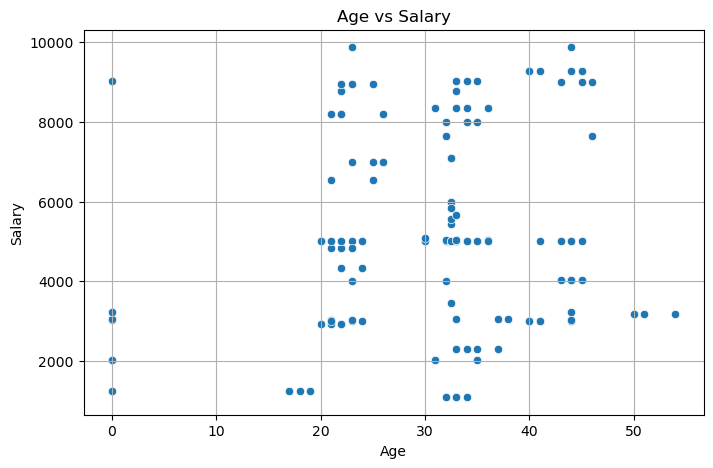

In [26]:
# Plotting Age vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='salary')
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

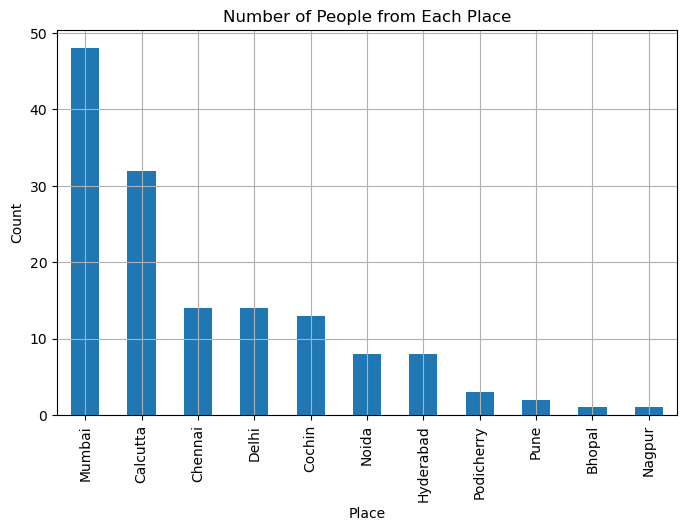

In [27]:
# Count people from each place and visualize
if 'place' in df.columns:
    place_counts = df['place'].value_counts()
    place_counts.plot(kind='bar', figsize=(8, 5), title="Number of People from Each Place")
    plt.xlabel("Place")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


In [28]:
# Step 5: Data Encoding
#Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

# Label Encoding for binary columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])

# One-Hot Encoding for other categorical variables
df = pd.get_dummies(df, drop_first=True)

print("\nData after Encoding:\n", df.head())



Data after Encoding:
     age  salary  gender  company_Congnizant  company_Infosys  \
0  20.0  5000.0       0                   0                0   
1  30.0  5000.0       0                   0                1   
2  35.0  2300.0       0                   0                0   
3  40.0  3000.0       0                   0                1   
4  23.0  4000.0       0                   0                0   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                        0            1                                  0   
1                        0            0                                  0   
2                        0            1                                  0   
3                        0            0                                  0   
4                        0            1                                  0   

   place_Calcutta  place_Chennai  place_Cochin  place_Delhi  place_Hyderabad  \
0               0              1           

In [29]:
# Step 6: Feature Scaling
#After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

# Standard Scaling
scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(df)
df_std = pd.DataFrame(scaled_std, columns=df.columns)


In [30]:
# Min-Max Scaling
scaler_mm = MinMaxScaler()
scaled_mm = scaler_mm.fit_transform(df)
df_mm = pd.DataFrame(scaled_mm, columns=df.columns)


In [31]:
# Show scaled data
print("\nStandard Scaled Data (first 5 rows):\n", df_std.head())
print("\nMin-Max Scaled Data (first 5 rows):\n", df_mm.head())


Standard Scaled Data (first 5 rows):
         age    salary    gender  company_Congnizant  company_Infosys  \
0 -1.033034 -0.100827 -0.534522           -0.118678        -0.652490   
1 -0.073002 -0.100827 -0.534522           -0.118678         1.532592   
2  0.407013 -1.243735 -0.534522           -0.118678        -0.652490   
3  0.887029 -0.947426 -0.534522           -0.118678         1.532592   
4 -0.745024 -0.524127 -0.534522           -0.118678        -0.652490   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                -0.118678     1.183216                          -0.118678   
1                -0.118678    -0.845154                          -0.118678   
2                -0.118678     1.183216                          -0.118678   
3                -0.118678    -0.845154                          -0.118678   
4                -0.118678     1.183216                          -0.118678   

   place_Calcutta  place_Chennai  place_Cochin  place_Delhi